<a href="https://colab.research.google.com/github/JamKia/datetime-1/blob/main/datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import numpy as np
date_range=pd.date_range(start='1/1/2018',end='1/1/2019',freq='H')
print('df:\n',date_range)

df=pd.DataFrame(date_range,columns=['date'])
df['price'] = np.random.randint(0,100,size=(len(date_range)))
df['datetime']=pd.to_datetime(df['date'])
df['day_name']= df['datetime'].apply(lambda x: x.strftime('%a'))

df.drop(['date'],axis=1,inplace=True)
print('df:\n',df.head(10))
df_copy=df[['datetime','price']].copy()
print('df_copy:\n',df_copy.head(10))
df.set_index('datetime',inplace=True)
df['year'],df['month'],df['day'],df['weekday']=df.index.year,df.index.month,df.index.day,df.index.weekday_name
print('\n resolution:\t',df.index.resolution)
df_copy.set_index('datetime',inplace=True)
# Mean value of price per day
df_copy_copy=df_copy.resample('D').mean()
df_copy_copy.reset_index(inplace=True)
print('df_copy:\n',df_copy_copy.head(10))
df_copy_copy['day_name']=df_copy_copy['datetime'].apply(lambda x: x.strftime('%a'))
df_copy_copy.set_index(['datetime'],inplace=True)
print('df_copy_copy:\n',df_copy_copy.head(10))

###################################################
print('\n want to see data where the date is the 2nd of the month:\n'
      ,df[df.index.day==2])
print('\n want to see data where the date is the 2nd of the week:\n'
      ,df[df.index.weekday==2])
print('\n want to see data where the date is the 2nd of the month:\n'
      ,df[df.index.hour==9])
print("df['2018-01-03']:\n",df['2018-01-03'])

df['rolling_sum']=df['price'].rolling(30).mean()
df['rolling_backfilled']= df['price'].rolling(30).mean().fillna(method='backfill')
print(df)

df2 = df[df.index > datetime.datetime(2018,12,20)]
df2 = df2[ df2.index <= datetime.datetime(2019,1,1)]
print('df2:\n',df2)
####################################################
date1 = datetime.datetime(2018,12,31)
date2 = datetime.datetime(2019,1,1,12)

date_slice = np.logical_and(df.index >= date1, df.index <= date2)
# notice that if you are using more than 2 comparisons use logical_and.reduce([test1, test2, test2])
sliced_df_1 = df[date_slice]
print('sliced_df_1:\n',sliced_df_1)

sliced_df_2 = df[date1:date2]
print('sliced_df_2:\n',sliced_df_2)

# or
sliced_df_3 = df.loc[date1:date2, :]
print('sliced_df_3:\n',sliced_df_3)
#or
# sliced_df_4 = df.iloc[date1:date2]
# print('sliced_df_4:\n',sliced_df_4)
####################################################
sliced_df_5=df[(date1 <= df.index) &
               (df.index <= date2)]
print('sliced_df_5:\n',sliced_df_5)
sliced_df_5['week_start'] = sliced_df_5.index.to_period('W').start_time
sliced_df_5['next_week_start'] = sliced_df_5['week_start'] + pd.DateOffset(weeks=1)
print('sliced_df_5:\n',sliced_df_5)
####################################################


df:
 DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-12-31 15:00:00', '2018-12-31 16:00:00',
               '2018-12-31 17:00:00', '2018-12-31 18:00:00',
               '2018-12-31 19:00:00', '2018-12-31 20:00:00',
               '2018-12-31 21:00:00', '2018-12-31 22:00:00',
               '2018-12-31 23:00:00', '2019-01-01 00:00:00'],
              dtype='datetime64[ns]', length=8761, freq='H')
df:
    price            datetime day_name
0     35 2018-01-01 00:00:00      Mon
1     26 2018-01-01 01:00:00      Mon
2     54 2018-01-01 02:00:00      Mon
3     44 2018-01-01 03:00:00      Mon
4     49 2018-01-01 04:00:00      Mon
5     72 2018-01-01 05:00:00      Mon
6     86 2018-01-01 06:00:00     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
print("df.loc['2018-12-31 00:00:00']:\n",df.loc['2018-12-31 00:00:00'])
print("\n df.loc['2018-12-31 00:00:00':'2018-12-31 02:00:00']:\n\n",df.loc['2018-12-31 00:00:00':'2018-12-31 02:00:00'])
print("\n df.loc['2018-12-31']:\n",df.loc['2018-12-31'])
print("\n df.loc['2018-12']:\n",df.loc['2018-12'])
print("\n date_range: \n",date_range)
string_date_range=[str(x) for x in date_range]
print('\n string date range:\n',string_date_range)
timestamp_date_range=pd.to_datetime(string_date_range,infer_datetime_format=True)
print('\n timestamp date range:\n',timestamp_date_range)

df.loc['2018-12-31 00:00:00']:
 price                     26
day_name                 Mon
year                    2018
month                     12
day                       31
weekday               Monday
rolling_sum             44.9
rolling_backfilled      44.9
Name: 2018-12-31 00:00:00, dtype: object

 df.loc['2018-12-31 00:00:00':'2018-12-31 02:00:00']:

                      price day_name  year  month  day weekday  rolling_sum  \
datetime                                                                     
2018-12-31 00:00:00     26      Mon  2018     12   31  Monday    44.900000   
2018-12-31 01:00:00     39      Mon  2018     12   31  Monday    43.233333   
2018-12-31 02:00:00     61      Mon  2018     12   31  Monday    43.500000   

                     rolling_backfilled  
datetime                                 
2018-12-31 00:00:00           44.900000  
2018-12-31 01:00:00           43.233333  
2018-12-31 02:00:00           43.500000  

 df.loc['2018-12-31']:
             

In [ ]:
import datetime
string_date_range_2 = ['June-01-2018', 'June-02-2018', 'June-03-2018']
timestamp_date_range_2=[datetime.datetime.strptime(x,'%B-%d-%Y') for x in string_date_range_2]
print(timestamp_date_range_2)
string_date_range_2 = ['June/01/2018', 'June/02/2018', 'June/03/2018']
timestamp_date_range_2=[datetime.datetime.strptime(x,'%B/%d/%Y') for x in string_date_range_2]
print(timestamp_date_range_2)
df2=pd.DataFrame(timestamp_date_range_2,columns=['date'])
print(df2)

[datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 2, 0, 0), datetime.datetime(2018, 6, 3, 0, 0)]
[datetime.datetime(2018, 6, 1, 0, 0), datetime.datetime(2018, 6, 2, 0, 0), datetime.datetime(2018, 6, 3, 0, 0)]
        date
0 2018-06-01
1 2018-06-02
2 2018-06-03


In [ ]:
df['2018-05'].head(5)

,price,day_name,rolling_sum,rolling_backfilled
datetime,,,,
2018-05-01 00:00:00,79,Tue,51.133333,51.133333
2018-05-01 01:00:00,66,Tue,52.866667,52.866667
2018-05-01 02:00:00,25,Tue,51.466667,51.466667
2018-05-01 03:00:00,93,Tue,51.566667,51.566667
2018-05-01 04:00:00,74,Tue,51.033333,51.033333


In [ ]:
# Observations after May 3rd, 2018
df[datetime(2018,12,29):]

TypeError: ignored

In [ ]:
df['5/12/2018':'5/12/2018']

In [ ]:
df.truncate(after='2/1/2018')

In [ ]:
print(df['5/12/2018'])

In [ ]:
# Count the number of observations per timestamp
df.groupby(level=0).count()

In [ ]:
df.resample('D').plot()
df.resample('M').plot()

In [ ]:
import calendar
print(calendar.month(2019,2))

import datetime
print(datetime.date.today().isoformat())
datetime.date.today()


In [ ]:
print(datetime.datetime.now())
datetime.datetime.now()
t1=datetime.datetime.now()

In [ ]:
t2=datetime.datetime.now()
delta_t=t2-t1; print(delta_t)

In [ ]:
import time
print('float time is:', time.time(),'\n','human time is:',time.ctime()) #float time value
later=time.time()+20
print('15 seconds after now is:',time.ctime(later))

In [ ]:
import calendar
print(calendar.month(2019,2))
my_calendar=calendar.setfirstweekday(calendar.SUNDAY)
print(calendar.month(2019,2))

In [ ]:
# Returns the day of the week (0 is Monday) for year (1970–…), month (1–12), day (1–31).
print('number of the weekday:',calendar.weekday(2019,1,10))
print(calendar.weekheader(3))
print(calendar.monthrange(2019,1),'\n','weekday of first day in month:',calendar.monthrange(2019,1)[0],'\n number of weekdays in month:',calendar.monthrange(2019,1)[1])
calendar.prmonth(2019,1)
calendar.prcal(2019)
calendar.prmonth(2019,3)
print(calendar.monthcalendar(2019,3))

In [ ]:
import datetime
that_date=datetime.datetime(2019,1,30,8,29,54).ctime()
print('that date:\t',that_date)
this_day=datetime.date(2019,1,30)
this_time=datetime.time(8,29,54)
this_date=datetime.datetime.combine(this_day,this_time)
print('this date:\t',this_date)
date_1 = datetime.datetime.strptime('1/1/19 16:30:9','%d/%m/%y %H:%M:%S')
print(date_1)
date_1_edited = date_1.strftime('%A, %d. %B %y %I:%M%p')
print(date_1_edited)
#print('The {1} is {0:%d}, the {2} is {0:%B}, the {3} is {0:%I:%M%p}.'.format(date_1_edited, 'day','month','time'))

In [ ]:
import datetime
x = datetime.datetime(2018, 12, 1,14,31,8)
print(x.strftime("%B"))
print(x.strftime("%b"))
print('month as a number:',x.strftime("%m"))
print('day of month:',x.strftime("%d"))
print(x.strftime("%a"))
print(x.strftime("%A"))
print('weekday as a number:',x.strftime("%w"))
print('year (short version):',x.strftime("%y"))
print('year (full version):',x.strftime("%Y"))
print('Hour (00-23):',x.strftime("%H"))
print('Hour (00-12):',x.strftime("%I"))
print('AM/PM:',x.strftime("%p"))
print('minute 00-59:',x.strftime("%M"))
print('seconds 00-59:',x.strftime("%S"))
print('microseconds 000000:',x.strftime("%f"))
print('day number of the year:',x.strftime("%j"))
print('local version of date and time:',x.strftime("%c"))
print('local version of date:',x.strftime("%x"))
print('local version of time:',x.strftime("%X"))


print('week number of the year (Monday as the first day of week):',x.strftime("%W"))
print('week number of the year (Sunday as the first day of week):',x.strftime("%U"))

print('UTC offset:',x.strftime("%z"))
print('Timezone:',x.strftime("%Z"))

In [ ]:
import datetime
timestamp=1528797322
print('c type:\t', datetime.datetime.fromtimestamp(timestamp).strftime('%c'),
      '\n',
      'date:\t',datetime.datetime.fromtimestamp(timestamp).strftime('%x'),
      '\n',
      'time:\t',datetime.datetime.fromtimestamp(timestamp).strftime('%X')
     )
      





In [ ]:
import datetime
today=datetime.date.today()
print('current year:\t', today.year)
print('current month:\t', today.month)
print('current day:\t', today.day)

In [ ]:
from datetime import datetime
str1 = '9-15-18'  
date_object1 = datetime.strptime(str1, '%m-%d-%y')
print(date_object1)
str2 = '9-15-2018'  
date_object2 = datetime.strptime(str2, '%m-%d-%Y')
print(date_object2)
str3 = '9/15/2018'  
date_object3 = datetime.strptime(str3, '%m/%d/%Y')
print(date_object3)
print(date_object3.strftime('%B'),date_object3.strftime('%b'))
print(date_object3.strftime('%Y'),date_object3.strftime('%B'),
     date_object3.strftime('%d'))

In [ ]:
import datetime
date_1=datetime.date(2019,6,14)
print(date_1)
time_1=datetime.time()
print(time_1)
time_1=datetime.time(hour=11,minute=34,second=56,microsecond=567987)
print(time_1)
print('hour:',time_1.hour,'\n',
     'minute:',time_1.minute,'\n',
     'second:',time_1.second,'\n',
     'microsecond:',time_1.microsecond)

In [ ]:
import datetime

a = datetime.datetime(2017, 11, 28, 23, 55, 59, 342380)
print("year =", a.year)
print("month =", a.month)
print("day =", a.day)
print("hour =", a.hour)
print("minute =", a.minute)
print("second =", a.second)
print("microsecond =", a.microsecond)
print("timestamp =", a.timestamp())

In [ ]:
day_offsets = pd.offsets.Day()
hour_offsets= pd.offsets.Hour(3)
ts = pd.Timestamp('2014-01-01 09:00')
print('\t\t\t',ts)
print('day_offsets:\t\t',day_offsets.apply(ts))
print('3 hour_offsets:\t\t',hour_offsets.apply(ts))
# To reset time to midnight, use normalize() before or after
# applying the operation 
# (depending on whether you want the time information included in the operation)
print('day_offsets normalize:\t',day_offsets.apply(ts).normalize())

In [ ]:
d = datetime.datetime(2008, 8, 18, 9, 0)
print(d.strftime('%a'))
print((d + pd.offsets.Week(weekday=4)).strftime('%A'))

In [ ]:
# apply the offset to each element>>> pd.DateOffset
rng = pd.date_range('2012-01-01', '2012-01-03')
series = pd.Series(rng)
series = series - pd.DateOffset(months=2)
print(series)
series = series - pd.DateOffset(minutes=15)
print(series)


In [ ]:
# Business Days
weekmask_egypt = 'Sun Mon Tue Wed Thu'

# They also observe International Workers' Day so let's
# add that for a couple of years
holidays = ['2012-05-01',
            datetime.datetime(2013, 5, 1),
             np.datetime64('2014-05-01')] 

bday_egypt = pd.offsets.CustomBusinessDay(holidays=holidays,
                                           weekmask=weekmask_egypt) 

dt = datetime.datetime(2013, 4, 30)

print(dt + 2 * bday_egypt)

In [ ]:
# Business Hours
bh = pd.offsets.BusinessHour(start='11:00', end=datetime.time(20, 0))
print(bh)

print(pd.Timestamp('2014-08-01 13:00') + bh)
print(pd.Timestamp('2014-08-01 09:00') + bh)
print(pd.Timestamp('2014-08-01 18:00') + bh)
print(pd.Timestamp('2014-08-01 18:00') + 2*bh)

In [ ]:
start_date=datetime.date(2018,12,3)
range=pd.date_range(start_date, periods=10, freq='D')
TimeSeries=pd.Series(range)
print(TimeSeries, '\n\n','period length=',len(TimeSeries))

In [ ]:
start_date=datetime.date(2018,12,3)
day_offsets=pd.offsets.Day(100)
end_date=day_offsets.apply(start_date)
range=pd.date_range(start_date, end_date, freq='W')
TimeSeries=pd.Series(range)
print(TimeSeries, '\n\n','period length=',len(TimeSeries))

### **VISUALIZATION**

In [ ]:
df

,price,day_name,year,month,day,weekday,rolling_sum,rolling_backfilled
datetime,,,,,,,,
2018-01-01 00:00:00,75,Mon,2018,1,1,Monday,NaN,56.333333
2018-01-01 01:00:00,76,Mon,2018,1,1,Monday,NaN,56.333333
2018-01-01 02:00:00,45,Mon,2018,1,1,Monday,NaN,56.333333
2018-01-01 03:00:00,82,Mon,2018,1,1,Monday,NaN,56.333333
2018-01-01 04:00:00,91,Mon,2018,1,1,Monday,NaN,56.333333
2018-01-01 05:00:00,84,Mon,2018,1,1,Monday,NaN,56.333333
2018-01-01 06:00:00,76,Mon,2018,1,1,Monday,NaN,56.333333
2018-01-01 07:00:00,83,Mon,2018,1,1,Monday,NaN,56.333333
2018-01-01 08:00:00,75,Mon,2018,1,1,Monday,NaN,56.333333


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})

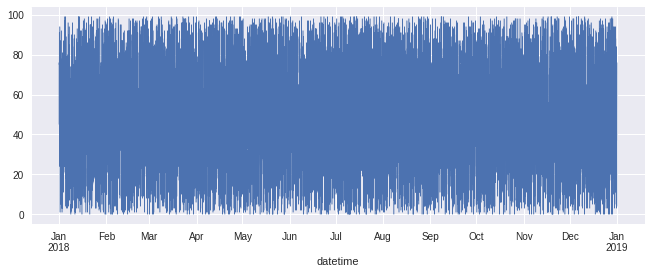

In [ ]:
df['price'].plot(linewidth=0.5)

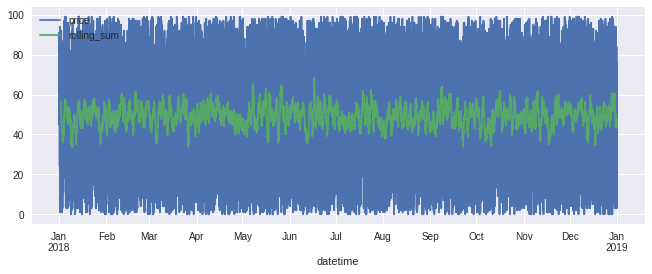

In [ ]:
df[['price','rolling_sum']].plot()

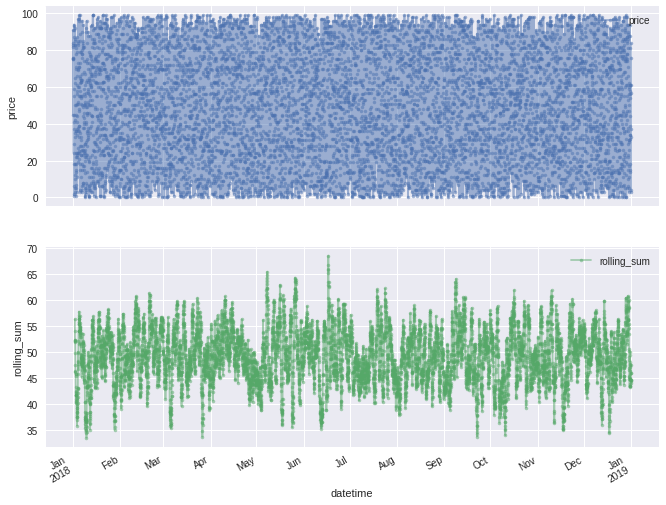

In [ ]:
axes = df[['price','rolling_sum']].plot(marker='.', alpha=0.5, linestyle='-', figsize=(11, 9), subplots=True)
for ax,label in zip(axes,['price','rolling_sum']):
    ax.set_ylabel(label)

In [ ]:
from datetime import timedelta

t1 = timedelta(weeks = 2, days = 5, hours = 1, seconds = 33)
t2 = timedelta(days = 4, hours = 11, minutes = 4, seconds = 54)
t3 = t1 - t2

print("t3 =", t3)

t3 = 14 days, 13:55:39


In [ ]:
from datetime import datetime, date

t1 = date(year = 2018, month = 7, day = 12)
t2 = date(year = 2017, month = 12, day = 23)
t3 = t1 - t2
print("t3 =", t3)

t4 = datetime(year = 2018, month = 7, day = 12, hour = 7, minute = 9, second = 33)
t5 = datetime(year = 2019, month = 6, day = 10, hour = 5, minute = 55, second = 13)
t6 = t4 - t5
print("t6 =", t6)

print("type of t3 =", type(t3)) 
print("type of t6 =", type(t6)) 

t3 = 201 days, 0:00:00
t6 = -333 days, 1:14:20
type of t3 = <class 'datetime.timedelta'>
type of t6 = <class 'datetime.timedelta'>


In [ ]:

from datetime import datetime

a = datetime(2017, 11, 28, 23, 55, 59, 342380)
print("year =", a.year)
print("month =", a.month)
print("hour =", a.hour)
print("minute =", a.minute)
print("timestamp =", a.timestamp())


year = 2017
month = 11
hour = 23
minute = 55
timestamp = 1511913359.34238


In [ ]:
from datetime import timedelta

t1 = timedelta(seconds = 33)
t2 = timedelta(seconds = 54)
t3 = t1 - t2

print("t3 =", t3)
print("t3 =", abs(t3))

t3 = -1 day, 23:59:39
t3 = 0:00:21


In [ ]:
from datetime import timedelta

t = timedelta(days = 5, hours = 1, seconds = 33, microseconds = 233423)
print("total seconds =", t.total_seconds())

total seconds = 435633.233423


In [ ]:
from datetime import datetime

# current date and time
now = datetime.now()

t = now.strftime("%H:%M:%S")
print("time:", t)

s1 = now.strftime("%m/%d/%Y, %H:%M:%S")
# mm/dd/YY H:M:S format
print("s1:", s1)

s2 = now.strftime("%d/%m/%Y, %H:%M:%S")
# dd/mm/YY H:M:S format
print("s2:", s2)

time: 22:48:54
s1: 03/11/2019, 22:48:54
s2: 11/03/2019, 22:48:54


In [ ]:
# Handling timezone in Python

from datetime import datetime
import pytz

local = datetime.now()
print("Local:", local.strftime("%m/%d/%Y, %H:%M:%S"))


tz_NY = pytz.timezone('America/New_York') 
datetime_NY = datetime.now(tz_NY)
print("NY:", datetime_NY.strftime("%m/%d/%Y, %H:%M:%S"))

tz_Tehran = pytz.timezone('Asia/Tehran')
datetime_Tehran = datetime.now(tz_Tehran)
print("Tehran:", datetime_Tehran.strftime("%m/%d/%Y, %H:%M:%S"))

print(datetime_Tehran-datetime_NY)

Local: 03/11/2019, 22:56:10
NY: 03/11/2019, 18:56:10
Tehran: 03/12/2019, 02:26:10
0:00:00.000411


In [ ]:
from datetime import datetime

timestamp = 1545730073
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2018-12-25 09:27:53
type(dt_object) = <class 'datetime.datetime'>


In [ ]:
df.resample('1H').agg({'openbid': 'first', 
                                 'highbid': 'max', 
                                 'lowbid': 'min', 
                                 'closebid': 'last'})

import pandas as pd
from collections import OrderedDict

df['ctime'] = pd.to_datetime(df['ctime'], unit='s')
df = btceur.set_index('ctime')
df = df.resample('5Min').agg(
    OrderedDict([
        ('open', 'first'),
        ('high', 'max'),
        ('low', 'min'),
        ('close', 'last'),
        ('volume', 'sum'),
    ])
)



data_ask =  data_frame['Ask'].resample('15Min').ohlc()

data_bid =  data_frame['Bid'].resample('15Min').ohlc()
#-----------------------------------------------------------------------------

from math import pi

import pandas as pd

from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.stocks import MSFT

df = pd.DataFrame(MSFT)[:50]
df["date"] = pd.to_datetime(df["date"])

inc = df.close > df.open
dec = df.open > df.close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = "MSFT Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(df.date, df.high, df.date, df.low, color="black")
p.vbar(df.date[inc], w, df.open[inc], df.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df.date[dec], w, df.open[dec], df.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

   r  j  a
0  1  2  3
1  1  2  3


In [ ]:

from datetime import time

# time(hour = 0, minute = 0, second = 0)
a = time()
print("a =", a)

# time(hour, minute and second)
b = time(11, 34, 56)
print("b =", b)

# time(hour, minute and second)
c = time(hour = 11, minute = 34, second = 56)
print("c =", c)

# time(hour, minute, second, microsecond)
d = time(11, 34, 56, 234566)
print("d =", d)

a = 00:00:00
b = 11:34:56
c = 11:34:56
d = 11:34:56.234566


In [ ]:

from datetime import datetime

a = datetime(2017, 11, 28, 23, 55, 59, 342380)
print("year =", a.year)
print("month =", a.month)
print("hour =", a.hour)
print("minute =", a.minute)
print("timestamp =", a.timestamp())

year = 2017
month = 11
hour = 23
minute = 55
timestamp = 1511913359.34238


In [ ]:

from datetime import datetime, date

t1 = date(year = 2018, month = 7, day = 12)
t2 = date(year = 2017, month = 12, day = 23)
t3 = t1 - t2
print("t3 =", t3)

t4 = datetime(year = 2018, month = 7, day = 12, hour = 7, minute = 9, second = 33)
t5 = datetime(year = 2019, month = 6, day = 10, hour = 5, minute = 55, second = 13)
t6 = t4 - t5
print("t6 =", t6)

print("type of t3 =", type(t3)) 
print("type of t6 =", type(t6))  

t3 = 201 days, 0:00:00
t6 = -333 days, 1:14:20
type of t3 = <class 'datetime.timedelta'>
type of t6 = <class 'datetime.timedelta'>


In [ ]:
from datetime import timedelta

t1 = timedelta(weeks = 2, days = 5, hours = 1, seconds = 33)
t2 = timedelta(days = 4, hours = 11, minutes = 4, seconds = 54)
t3 = t1 - t2

print("t3 =", t3)

t3 = 14 days, 13:55:39


In [ ]:

from datetime import timedelta

t1 = timedelta(seconds = 33)
t2 = timedelta(seconds = 54)
t3 = t1 - t2

print("t3 =", t3)
print("t3 =", abs(t3))

t3 = -1 day, 23:59:39
t3 = 0:00:21


In [ ]:
from datetime import timedelta

t = timedelta(days = 5, hours = 1, seconds = 33, microseconds = 233423)
print("total seconds =", t.total_seconds())

total seconds = 435633.233423


In [ ]:
# Format date using strftime()
from datetime import datetime

# current date and time
now = datetime.now()

t = now.strftime("%H:%M:%S")
print("time:", t)

s1 = now.strftime("%m/%d/%Y, %H:%M:%S")
# mm/dd/YY H:M:S format
print("s1:", s1)

s2 = now.strftime("%d/%m/%Y, %H:%M:%S")
# dd/mm/YY H:M:S format
print("s2:", s2)

time: 21:14:39
s1: 03/21/2019, 21:14:39
s2: 21/03/2019, 21:14:39


In [ ]:
# strptime()

from datetime import datetime

date_string = "21 June, 2018"
print("date_string =", date_string)

date_object = datetime.strptime(date_string, "%d %B, %Y")
print("date_object =", date_object)

date_string = 21 June, 2018
date_object = 2018-06-21 00:00:00


In [ ]:
# Python timestamp to datetime

from datetime import datetime

timestamp = 1545730073
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2018-12-25 09:27:53
type(dt_object) = <class 'datetime.datetime'>


In [ ]:
# Python datetime to timestamp

from datetime import datetime

# current date and time
now = datetime.now()

timestamp = datetime.timestamp(now)
print("timestamp =", timestamp)

timestamp = 1553203089.705072


In [ ]:
# The time() function returns the number of seconds passed since epoch.
# For Unix system, January 1, 1970, 00:00:00 at UTC is epoch (the point where time begins).

import time
seconds = time.time()
print("Seconds since epoch =", seconds)	

# The time.ctime() function takes seconds passed since epoch as an argument and returns a string representing local time.

import time

# seconds passed since epoch
seconds = 1545925769.9618232
local_time = time.ctime(seconds)
print("Local time:", local_time)

# sleep
import time

print("This is printed immediately.")
time.sleep(5.5)
print("This is printed after 5.5 seconds.")

Seconds since epoch = 1553203557.326647
Local time: Thu Dec 27 15:49:29 2018
This is printed immediately.
This is printed after 5.5 seconds.


In [ ]:
# The localtime() function takes the number of seconds passed since epoch as an argument and returns struct_time in local time.
import time

result = time.localtime(1545925769)
result=time.localtime()
print("result:", result)
print("Type of result:", type(result))

print("\nyear:", result.tm_year)
print("\nmon:", result.tm_mon)
print("\nmday:", result.tm_mday)
print("tm_hour:", result.tm_hour)
print("\nmin:", result.tm_min)
print("\nsec:", result.tm_sec)
print("\nweekday:", result.tm_wday)
print("\nyearday:", result.tm_yday)
print("\n isdst:", result.tm_isdst)

result: time.struct_time(tm_year=2019, tm_mon=3, tm_mday=21, tm_hour=21, tm_min=37, tm_sec=34, tm_wday=3, tm_yday=80, tm_isdst=0)
Type of result: <class 'time.struct_time'>

year: 2019

mon: 3

mday: 21
tm_hour: 21

min: 37

sec: 34

weekday: 3

yearday: 80

 isdst: 0


In [ ]:
# The gmtime() function takes the number of seconds passed since epoch as an argument and returns struct_time in UTC.
import time

result = time.gmtime(1545925769)
print("result:", result)
print("\nyear:", result.tm_year)
print("tm_hour:", result.tm_hour)

result: time.struct_time(tm_year=2018, tm_mon=12, tm_mday=27, tm_hour=15, tm_min=49, tm_sec=29, tm_wday=3, tm_yday=361, tm_isdst=0)

year: 2018
tm_hour: 15


In [ ]:
# The mktime() function takes struct_time (or a tuple containing 9 elements corresponding to struct_time)
# as an argument and returns the seconds passed since epoch in local time. Basically, it's the inverse function of localtime().

import time

t = (2018, 12, 28, 8, 44, 4, 4, 362, 0)

local_time = time.mktime(t)
print("Local time:", local_time)

Local time: 1545986644.0


In [ ]:
# The example below shows how mktime() and localtime() are related.
import time

seconds = 1545925769

# returns struct_time
t = time.localtime(seconds)
print("t1: ", t)

# returns seconds from struct_time
s = time.mktime(t)
print("\s:", seconds)

t1:  time.struct_time(tm_year=2018, tm_mon=12, tm_mday=27, tm_hour=15, tm_min=49, tm_sec=29, tm_wday=3, tm_yday=361, tm_isdst=0)
\s: 1545925769


In [ ]:
# The asctime() function takes struct_time 
#(or a tuple containing 9 elements corresponding to struct_time) 
#as an argument and returns a string representing it.

import time

t = (2018, 12, 28, 8, 44, 4, 4, 362, 0)

result = time.asctime(t)
print("Result:", result)

Result: Fri Dec 28 08:44:04 2018


In [ ]:
# The strftime() function takes struct_time (or tuple corresponding to it)
# as an argument and returns a string representing it based on the format code used.

import time

named_tuple = time.localtime() # get struct_time
time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)

print(time_string)

03/21/2019, 21:43:11


In [ ]:
# The strptime() function parses a string representing time and returns struct_time.
import time

time_string = "21 June, 2018"
result = time.strptime(time_string, "%d %B, %Y")

print(result)

time.struct_time(tm_year=2018, tm_mon=6, tm_mday=21, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=172, tm_isdst=-1)


In [ ]:
# Several functions in the time module such as gmtime(), asctime() etc. either take time.struct_time object as an argument or return it.
time.struct_time(tm_year=2018, tm_mon=12, tm_mday=27, 
                    tm_hour=6, tm_min=35, tm_sec=17, 
                    tm_wday=3, tm_yday=361, tm_isdst=0)

TypeError: ignored

In [ ]:
# create a digital clock

import time

while True:
  localtime = time.localtime()
  result = time.strftime("%I:%M:%S %p", localtime)
  print(result)
  time.sleep(1)

10:14:34 PM
10:14:35 PM
10:14:36 PM
10:14:37 PM


KeyboardInterrupt: ignored

In [ ]:

import time

while True:
  localtime = time.localtime()
  result = time.strftime("%I:%M:%S %p", localtime)
  print(result, end="", flush=True)
  print("\r", end="", flush=True)
  time.sleep(1)

KeyboardInterrupt: ignored

In [ ]:
import time
while True:
    from datetime import datetime
    now = datetime.now()  
    print ("%s/%s/%s %s:%s:%s" % (now.month,now.day,now.year,now.hour,now.minute,now.second)) 
    time.sleep(2)

In [ ]:
import time
while True:
    from datetime import datetime
    now = datetime.now()  
    # Note trailing comma, that suppresses the newline in Python
    print ("%s/%s/%s %s:%s:%s" % (now.month,now.day,now.year,now.hour,now.minute,now.second))

    # Now rewind back to the start of the line. Again, not trailing comma
    print("\r")
    time.sleep(2)


3/21/2019 22:23:48

3/21/2019 22:23:49

3/21/2019 22:23:50

3/21/2019 22:23:51

3/21/2019 22:23:52

3/21/2019 22:23:53

3/21/2019 22:23:54

3/21/2019 22:23:55

3/21/2019 22:23:56

3/21/2019 22:23:57

3/21/2019 22:23:58

3/21/2019 22:23:59



KeyboardInterrupt: ignored

In [ ]:
import time
import sys

while True:
    from datetime import datetime
    now = datetime.now()
    print ("%s/%s/%s %s:%s:%s" % (now.month,now.day,now.year,now.hour,now.minute,now.second)),
    sys.stdout.flush()
    print("\r"),
    time.sleep(1)

3/21/2019 22:25:20

3/21/2019 22:25:21

3/21/2019 22:25:22

3/21/2019 22:25:23

3/21/2019 22:25:24

3/21/2019 22:25:25

3/21/2019 22:25:26

3/21/2019 22:25:27

3/21/2019 22:25:28



KeyboardInterrupt: ignored

In [ ]:
import time

while True:
    from datetime import datetime,strftime
    now = datetime.now()
    print (strftime("%m/%d/%Y %H:%M:%S"), end="", flush=True)
    print("\r", end="", flush=True)
    time.sleep(1)

ImportError: ignored